<a href="https://colab.research.google.com/github/jychoi130/Study_ML_DL_Alone/blob/main/%ED%9A%8C%EA%B7%80_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03-1) k-최근접 이웃 회귀

In [6]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

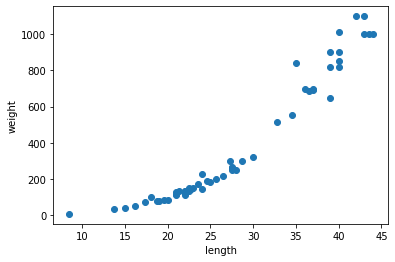

In [7]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state = 42)

sklearn에서 사용하는 훈련 세트는 2차원 배열이어야하기 때문에, 1차원 배열은 2차원 배열로 reshape 진행이 필요함

In [9]:
test_arr = np.array([1,2,3,4])
print(test_arr.shape)

(4,)


In [10]:
test_arr = test_arr.reshape(2,2)
print(test_arr.shape)

(2, 2)


In [11]:
train_input = train_input.reshape(-1, 1) #크기에 -1을 지정시 나머지 원소 개수로 모두 채우라는 의미 -> 첫 번째 크기를 원소 개수로 채우고 두 번째 크기를 1로 진행
test_input = test_input.reshape(-1,1)
print(train_input.shape,test_input.shape)

(42, 1) (14, 1)


In [12]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [13]:
print(knr.score(test_input, test_target))

0.992809406101064


score을 확인하기 위하여 결정계수를 사용    
결정계수 =  1 - ((타깃-예측)^2의 합)/(타깃-평균)^2의 합)

In [14]:
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input) #테스트 세트에 대한 예측을 만듦
mae = mean_absolute_error(test_target, test_prediction) #테스트 세트에 대한 평균 절댓값 오차 계산
#mean_absolute_error()는 회귀 모델의 평균 절댓값 오차를 계산, (타깃, 예측값) 전달
#mean_squared_error()는 평균 제곱 오차를 계산, 타깃과 예측값을 뺀 값을 제곱한 다음 전체 샘플에 대해 평균한 값 반환
print(mae)

19.157142857142862


In [15]:
print(knr.score(train_input, train_target))

0.9698823289099254


과대 적합: 훈련 세트에서는 점수가 높았으나 테스트 세트에서는 점수가 낮은 경우   
과소 적합: 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 낮은 경우    

현재 알고리즘에서는 과소 적합이 발생하였음 -> 테스트 점수가 훈련 점수보다 높음

In [16]:
knr.n_neighbors = 3 #체크하는 이웃의 개수를 줄여줘 과소적합을 해소

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target)) 
print(knr.score(test_input, test_target))

0.9804899950518966
0.9746459963987609


## 03-2) 선형 회귀

In [17]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [18]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [19]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors = 3)

knr.fit(train_input, train_target)

print(knr.predict([[50]]))

[1033.33333333]


50cm 농어가 실제 원하는 값보다 너무 작은 weight로 나왔음을 확인할 수 있음

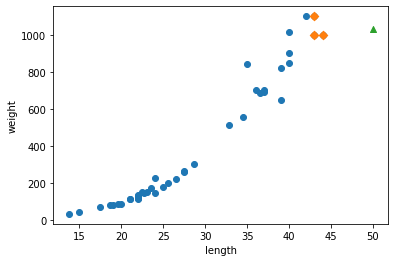

In [20]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([[50]]) #50cm 농어의 이웃을 구함

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes],marker='D') #훈련 세트 중 이웃 샘플만 다시 그림

plt.scatter(50, 1033, marker='^') #50cm 농어 데이터 그림
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

농어의 길이에 따라 무게가 점점 증가함을 그래프로 확인할 수 있으나 최근접이웃회귀알고리즘은 근처 이웃 3개의 무게의 평균으로 계산하기 때문에 길이가 길어져도 상대적으로 적은 무게로 예측됨을 확인할 수 있음

이를 해결하기 위해 선형 회귀 알고리즘을 활용    
선형 회귀 알고리즘: 특성이 하나인 경우 직선을 학습하는 방법을 통해 예측하는 알고리즘

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(train_input,train_target)
print(lr.predict([[50]]))

[1241.83860323]


선형 회귀는 y = a*x + b 식을 활용   
이때, a는 lr 객체의 coef_ 속성에, b는 lr 객체의 intercept_ 속성에 저장됨   
이때, coef_와 intercept_를 머신러닝이 찾은 값이라는 의미로 모델 파라미터라고 부름

In [22]:
print(lr.coef_,lr.intercept_)

[39.01714496] -709.0186449535477


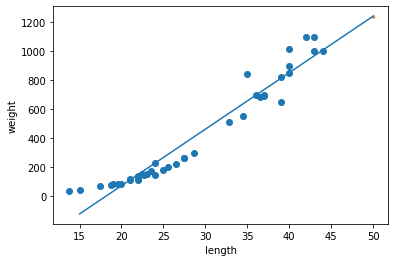

In [23]:
plt.scatter(train_input, train_target)
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
#15에서 50까지 1차 방정식 그래프를 그림

plt.scatter(50, 1241,8, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [24]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


농어의 무게가 직선이 아닌 곡선의 모양으로 변화하는 것을 확인할 수 있음    
이런 2차 방정식의 그래프를 그리려면 길이를 제곱한 항이 훈련 세트에 추가되어야함.    

#### 다항 회귀: 다항식을 이용한 선형 회귀(polynomial regression)

In [25]:
train_poly = np.column_stack((train_input**2,train_input))
test_poly = np.column_stack((test_input**2, test_input))

In [26]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [27]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [28]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


무게 = 1.01*(길이^2) - 21.6*길이 + 116.05

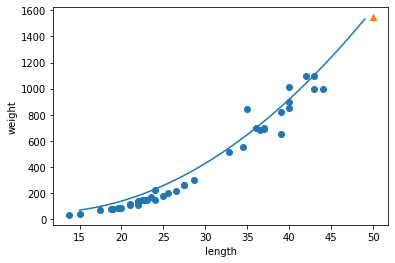

In [29]:
point = np.arange(15, 50) #구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 생성
plt.scatter(train_input,train_target) #훈련 세트의 산점도를 그림
plt.plot(point, 1.01*point**2-21.6*point +166.05)#15에서 49까지 2차 방정식 그래프를 그림
plt.scatter(50, 1547, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [30]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


# 03-3) 특성 공학과 규제

#### 다중 회귀(mulitple regression): 여러 개의 특성을 사용한 선형 회귀

##### 특성공학(feature engineering): 기존의 특성을 사용해 새로운 특성을 뽑아내는 작업

판다스(pandas)의 데이터프레임을 활용    
판다스 데이터프레임은 판다스의 핵심 데이터 구조이며 넘파이 배열과 비슷하게 다차원 배열을 다룰 수 있음

In [31]:
import pandas as pd
df = pd.read_csv('http://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [32]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [33]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스를 제공하는데, 이러한 클래스를 변환기(transformer)라고 함

In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


fit() 메서드는 새롭게 만들 특성 조합을 찾음    
transform() 메서드는 실제로 데이터를 변환함    
fit을 진행 후에 transform(변환) 가능

PolynomialFeatures 클래스는 각 특성을 제곱한 항, 특성끼리 곱한 항을 추가함    
-> 상위 내용의 결과가 [[1. 2. 3. 4. 6. 9]]가 나옴    
-> 4(2의 제곱), 9(3의 제곱), 6(2*3)    
-> 1은 선형 방정식의 절편을 항상 값이 1인 특성과 곱해지는 계수라고 볼 수 있기때문에 추가되어있음 (특성이 (길이, 높이, 두께, 1))    
=> 사이킷런이 선형 모델은 자동으로 절편을 추가하기 때문에 특성을 만들 필요가 없음     
=> 1을 제거하고 특성을 만들기 위해서는 include_bias = False로 지정하면 됨

In [36]:
poly = PolynomialFeatures(include_bias = False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [37]:
poly = PolynomialFeatures(include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [38]:
poly.get_feature_names_out()
#특성이 어떤 입력 조합으로 만들어졌는지 확인할 수 있는 메소드

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [39]:
test_poly = poly.transform(test_input)

In [40]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [41]:
print(lr.score(test_poly, test_target))

0.9714559911594134


PolynomialFeatures 클래스의 degree 매개변수를 이용하면 고차항의 최대 차수를 지정할 수 있음

In [43]:
poly = PolynomialFeatures(degree = 5, include_bias = False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [44]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991097


In [45]:
print(lr.score(test_poly, test_target))

-144.40579242684848


모델이 과대적합으로 인하여 테스트 세트에서 나쁜 결과가 나왔음을 확인할 수 있음

#### 규제(regularization): 머신러닝 모델이 훈련 세트를 너무 과도하게 학습하지 못하도록 하는 것

In [46]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

### 규제 모델로 릿지(ridge)와 라쏘(lasso) 존재

#### 릿지: 계수를 제곱한 값을 기준으로 규제 적용    
#### 라쏘: 계수의 절대값을 기준으로 규제를 적용    
릿지가 비교적 선호되고 있음

In [47]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [48]:
print(ridge.score(test_scaled, test_target))

0.9790693977615397


알파값을 통하여 규제의 양을 조절할 수 있으며 가장 적절한 알파값을 찾기 위해서는 R^2의 그래프를 그려봐야 함    
-> 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 최적의 알파값     

모델이 학습할 수 없고 사람이 직접 값을 지정해야하는 매개변수를 하이퍼파라미터라고 함

In [49]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

#### 릿지 회귀

In [50]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

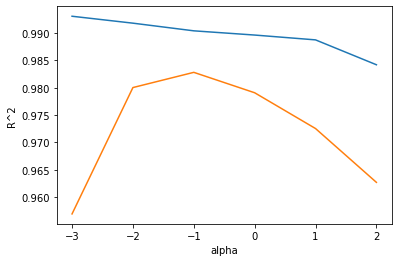

In [52]:
plt.plot(np.log10(alpha_list),train_score) #너무 촘촘하지 않게 지수로 표시하기 위해 로그값 취해줌
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

상위 그래프에서 위 그래프가 훈련 세트 그래프, 밑 그래프가 테스트 세트 그래프     
그래프에서 값이 가장 차이나지 않은 alpha = 10^(-1)인 0.1이 가장 적합한 알파값이다.

In [53]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570366
0.9827976465386926


#### 라쏘 회귀

In [54]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [55]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883


In [65]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha = alpha, max_iter = 100000000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

라쏘 모델을 훈련할 때 ConvergenceWarning이 발생할 수 있는데 이는 사이킷런의 라쏘 모델은 최적의 계수를 찾기 위해 반복적인 계산을 수행하는데, 지정한 반복 횟수가 부족할 때 이런 경고가 발생함    
-> 해당 경고 발생하였으며 이때 max_iter을 올려주면 해결 됨. 실제 책의 예시에서는 10000으로 max_iter가 설정되어있지만 100000000으로 설정할 때까지 계속 경고가 발생하였음

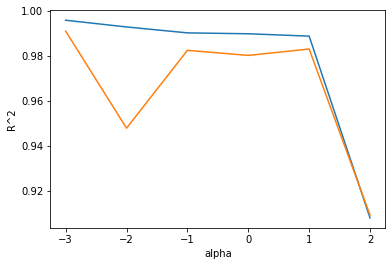

In [67]:
plt.plot(np.log10(alpha_list), train_score) #파란색 그래프
plt.plot(np.log10(alpha_list), test_score) #주황색 그래프
plt.xlabel('alpha') 
plt.ylabel('R^2')
plt.show()

최적의 알파값은 1, 즉 10임을 확인할 수 있음

In [68]:
lasso = Lasso(alpha = 10)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9888067471131867
0.9824470598706695


라쏘 모델은 계수 값을 0으로 만들 수 있으며 라쏘 모델의 coef_ 속성에 저장되어있음

In [69]:
print(np.sum(lasso.coef_ == 0))

40


55개의 특성을 모델에 넣었으나 15개의 특성이 유효했음을 확인할 수 있음    
-> 유효한 특성을 고르기 위해서 라쏘 모델을 활용하기도 함